Yarışma: https://www.kaggle.com/competitions/playground-series-s4e5


Veriyi Yükleme

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle competitions download -c playground-series-s4e5

 93% 26.0M/28.0M [00:03<00:00, 9.95MB/s]
100% 28.0M/28.0M [00:03<00:00, 9.58MB/s]


In [ ]:
!unzip playground-series-s4e5.zip

Archive:  playground-series-s4e5.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# @title Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### EDA

In [ ]:
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
train_df.sample()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
937136,937136,13,3,7,5,5,5,6,5,8,...,5,3,3,5,7,1,3,7,4,0.535


In [ ]:
train_df.shape

(1117957, 22)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
train_df.isnull().sum()

,0
id,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0


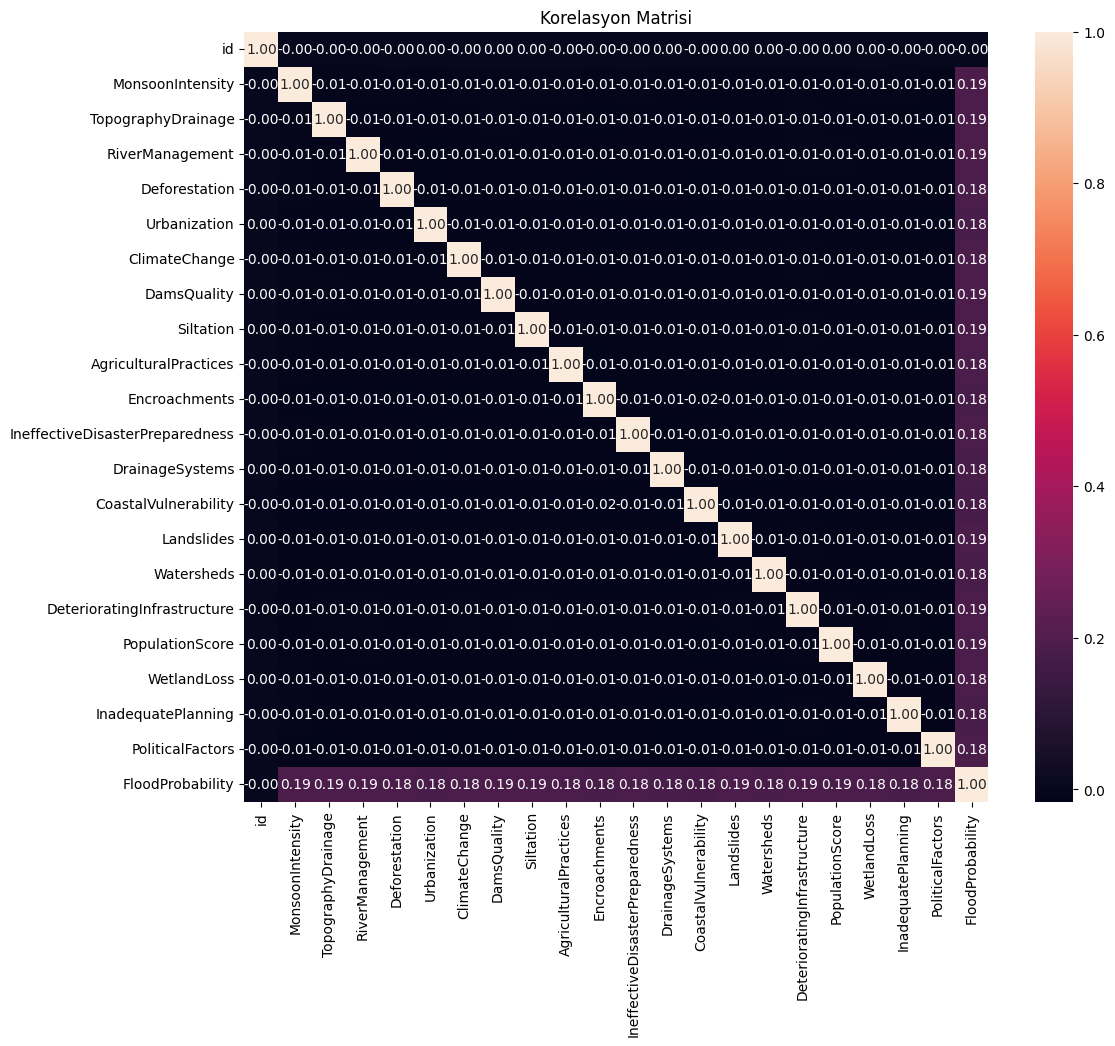

In [ ]:
# Korelasyon Matrisi
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [ ]:
train_df['FloodProbability'].sort_values(ascending = False)

,FloodProbability
516040,0.725
547863,0.725
561217,0.725
945383,0.725
570278,0.725
...,...
164256,0.285
514690,0.285
418131,0.285
427820,0.285


## Modelleme

Veri setini eğitim ve test olarak ayırma

In [ ]:
X = train_df.drop('FloodProbability', axis=1)
y = train_df['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor Modeli

In [ ]:
import numpy as np
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 0.03027243711009939


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 0.0009164204485849227


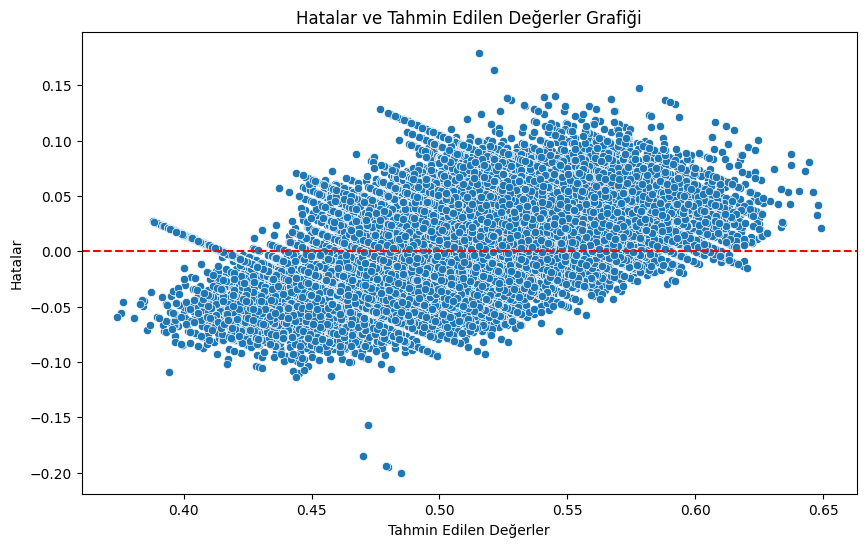

In [ ]:
# Residuals Hesaplama
residuals = y_test - y_pred_rf

# Residuals Grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Hatalar ve Tahmin Edilen Değerler Grafiği')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Hatalar')
plt.show()

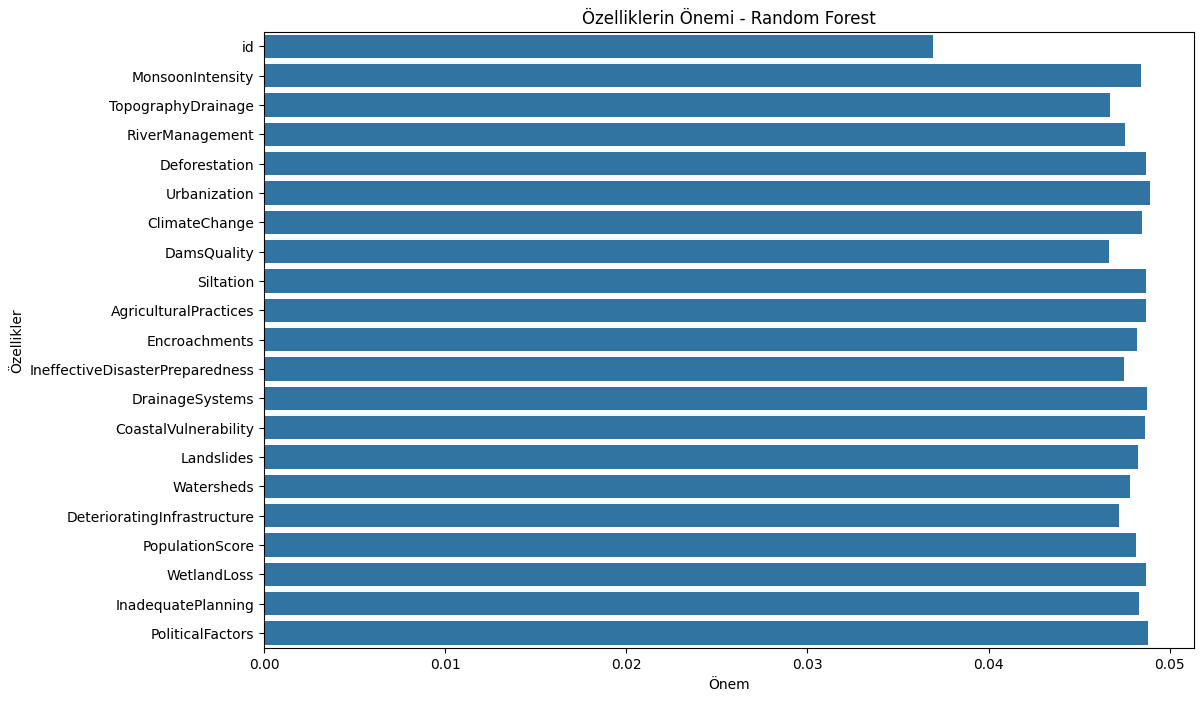

In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Özellik Önem Grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Özelliklerin Önemi - Random Forest')
plt.xlabel('Önem')
plt.ylabel('Özellikler')
plt.show()

### Lineer Regresyon Modeli

In [ ]:
# Lineer Regresyon Modeli
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_l = linear_model.predict(X_test)

In [ ]:
# Metrikleri Hesaplama
mse_linear = mean_squared_error(y_test, y_pred_l)
rmse_linear = np.sqrt(mse_linear)
print(f"Lineer Regresyon MSE: {mse_linear}")
print(f"Lineer Regresyon RMSE: {rmse_linear}")

Lineer Regresyon MSE: 0.0004032065305121672
Lineer Regresyon RMSE: 0.020080003249804697


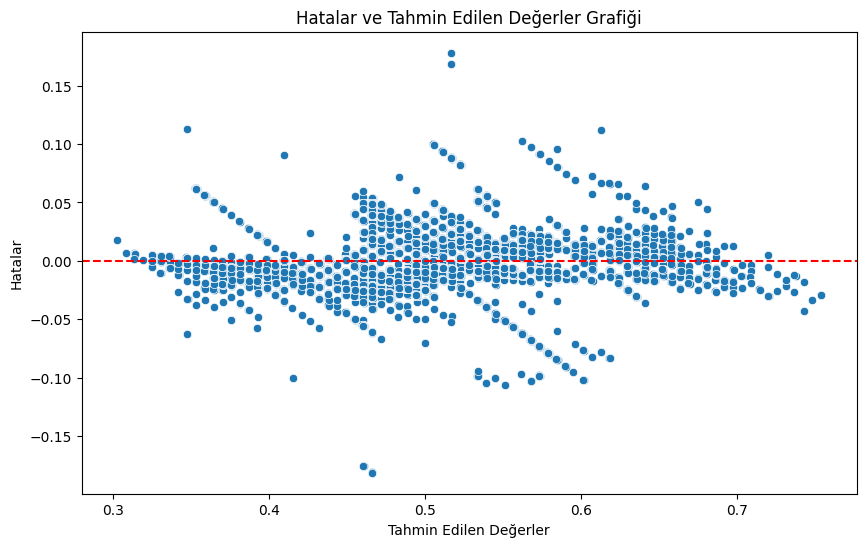

In [ ]:
# Residuals Hesaplama
residuals = y_test - y_pred_l

# Residuals Grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_l, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Hatalar ve Tahmin Edilen Değerler Grafiği')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Hatalar')
plt.show()

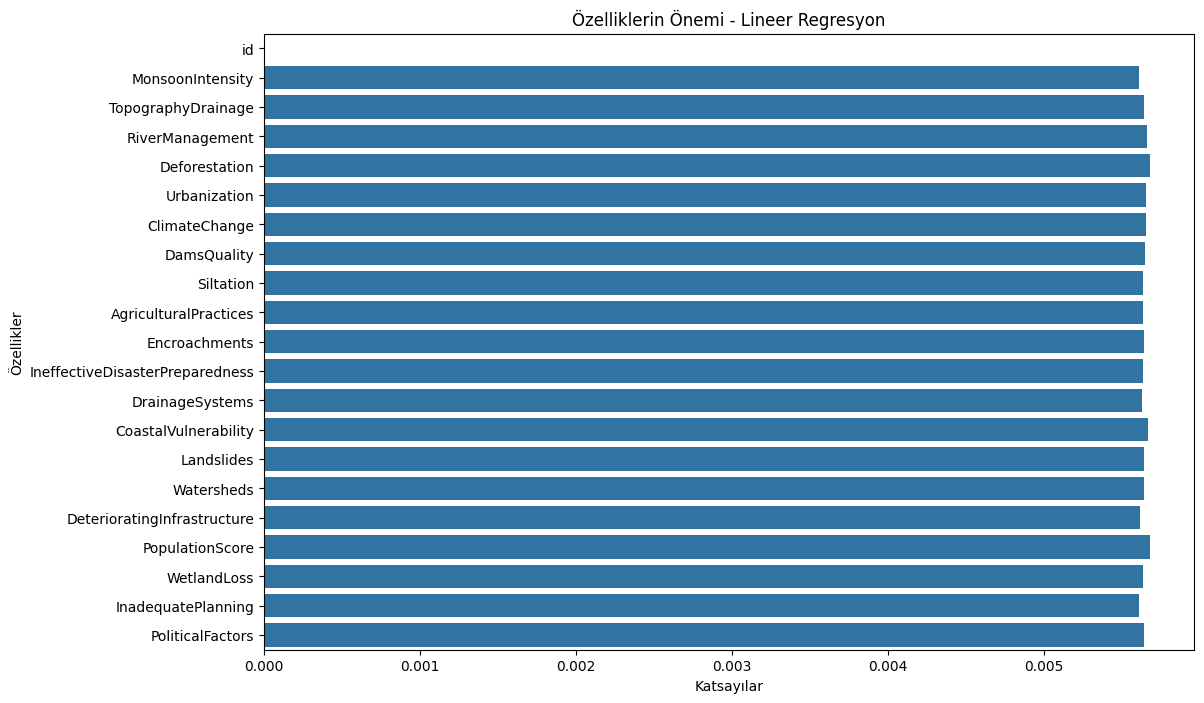

In [ ]:
# Linear Regression ile Özelliklerin Katsayılarını Hesaplama
importances = linear_model.coef_
feature_names = X.columns

# Özellik Önem Grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Özelliklerin Önemi - Lineer Regresyon')
plt.xlabel('Katsayılar')
plt.ylabel('Özellikler')
plt.show()

### XGBoost Modeli

In [ ]:
import xgboost as xgb

# XGBoost Modeli
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_xgb = xgb_model.predict(X_test)

# Performans değerlendirme
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")

XGBoost MSE: 0.0004976185148410598
XGBoost RMSE: 0.02230736458753162


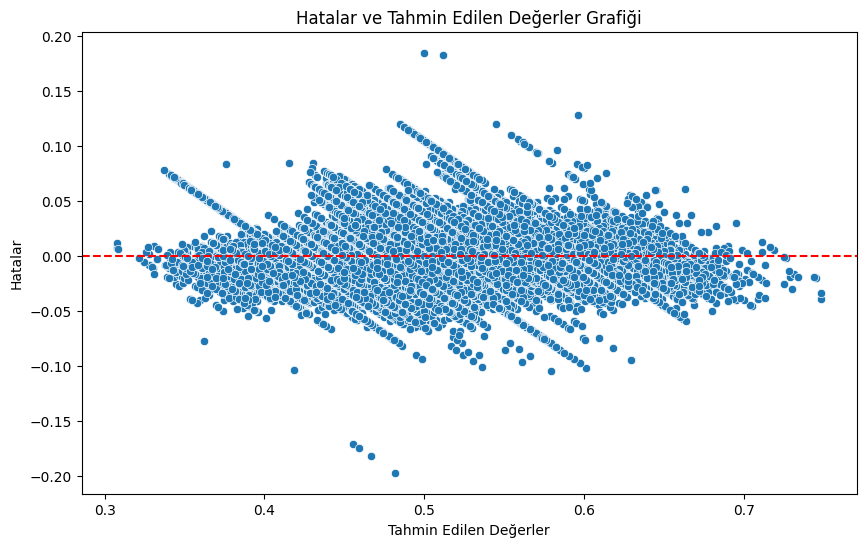

In [ ]:
# Residuals Hesaplama
residuals = y_test - y_pred_xgb

# Residuals Grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Hatalar ve Tahmin Edilen Değerler Grafiği')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Hatalar')
plt.show()

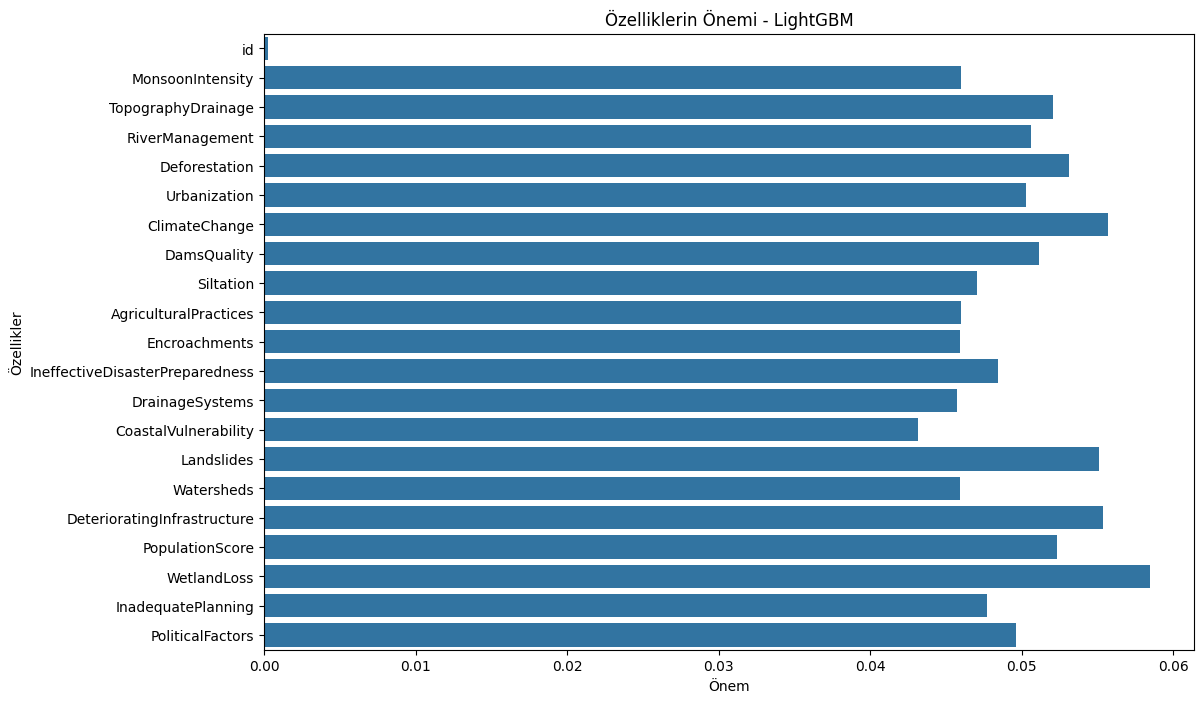

In [ ]:
# Feature Importance
importances = xgb_model.feature_importances_
feature_names = X.columns

# Özellik Önem Grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Özelliklerin Önemi - LightGBM')
plt.xlabel('Önem')
plt.ylabel('Özellikler')
plt.show()

## LightGBM Modeli

In [ ]:
import lightgbm as lgb

# LightGBM Modeli
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_lgb = lgb_model.predict(X_test)

# Performans değerlendirme
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
print(f"LightGBM MSE: {mse_lgb}")
print(f"LightGBM RMSE: {rmse_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 21
[LightGBM] [Info] Start training from score 0.504480
LightGBM MSE: 0.0006090974999186309
LightGBM RMSE: 0.024679900727487356


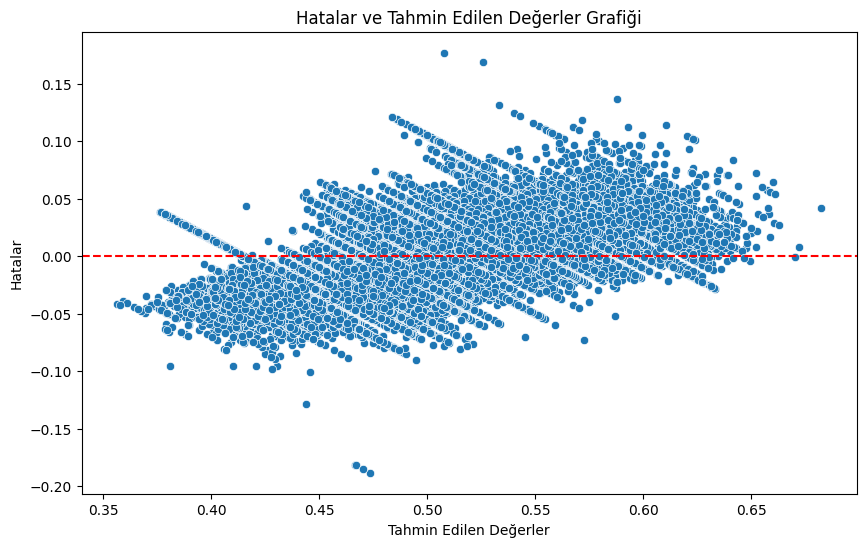

In [ ]:
# Residuals Hesaplama
residuals = y_test - y_pred_lgb

# Residuals Grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lgb, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Hatalar ve Tahmin Edilen Değerler Grafiği')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Hatalar')
plt.show()

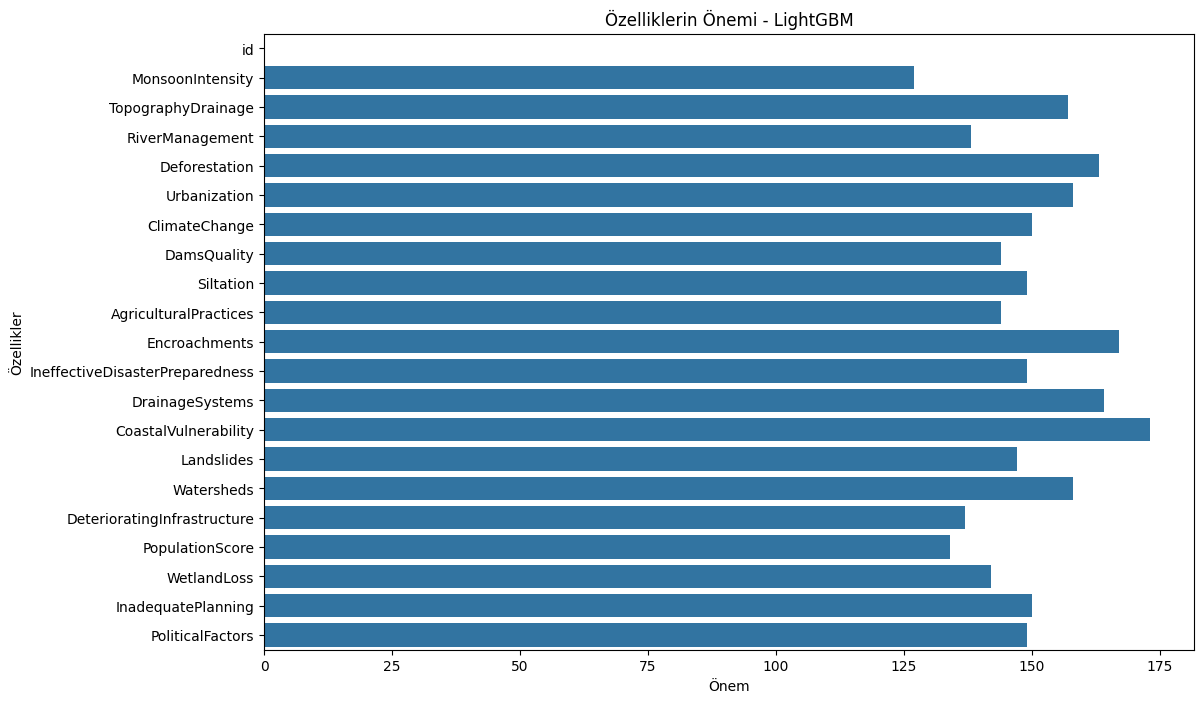

In [ ]:
# Feature Importance
importances = lgb_model.feature_importances_
feature_names = X.columns

# Özellik Önem Grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Özelliklerin Önemi - LightGBM')
plt.xlabel('Önem')
plt.ylabel('Özellikler')
plt.show()

## Test Verileriyle Tahmin Yapma

In [ ]:
test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


En düşük RMSE ve MSE değerine sahip model Lineer Regresyon olarak görünmektedir. O yüzden tahmin Lineer Regresyon Modeli ile yapılması tercih edildi.

Lineer Regresyon Modeli ile Tahmin;

In [ ]:
y_pred_test = linear_model.predict(test_df)
submission_df = pd.DataFrame({'FloodProbability': y_pred_test})

# ID Ekleme ve CSV Olarak Kaydetme
submission_df['id'] = test_df['id']
submission_df = submission_df[['id', 'FloodProbability']]
submission_df.to_csv('submission.csv', index=False)
print(submission_df.head())

        id  FloodProbability
0  1117957          0.573614
1  1117958          0.455272
2  1117959          0.454753
3  1117960          0.466180
4  1117961          0.466086


XGBoost Modeli ile Tahmin;

In [ ]:
# XGBoost Modeli
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Test Verileriyle Tahmin Yapma
y_pred_test = xgb_model.predict(test_df)
submission_df = pd.DataFrame({'FloodProbability': y_pred_test})

# ID Ekleme ve CSV Olarak Kaydetme
submission_df['id'] = test_df['id']
submission_df = submission_df[['id', 'FloodProbability']]
submission_df.to_csv('submissionX.csv', index=False)

# Sonuçları Kontrol Etme
print(submission_df.head())

        id  FloodProbability
0  1117957          0.574229
1  1117958          0.469049
2  1117959          0.464886
3  1117960          0.457429
4  1117961          0.468270


XGBoost da iyi sonuçlar verdiği için onunla da tahmin yapıldı.